### ***Aproximación de una Función Cuadrática***
En este cuaderno se codifica un algoritmo para aproximar un conjunto de datos a una función cuadrática. El método usado es la expansión de las características del perceptron usado en la función lineal. Se usa una función cuadrática semilla para generar unos datos mediante un ruido aleatorio y con estos datos se entrena al perceptrón. Para ello se usa el método del descenso del gradiente usando una tasa de aprendizaje $\alpha=0.0001$ y una cantidad de $200000$ épocas de entrenamiento.

In [2]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

#### ***Función Generadora***
A continuación se define una función generadora que permite generar 12 datos con una pequeña perturbación en cada dato. Esto con el fin de entrenar al perceptron en la aproximación de una función cuadrática.

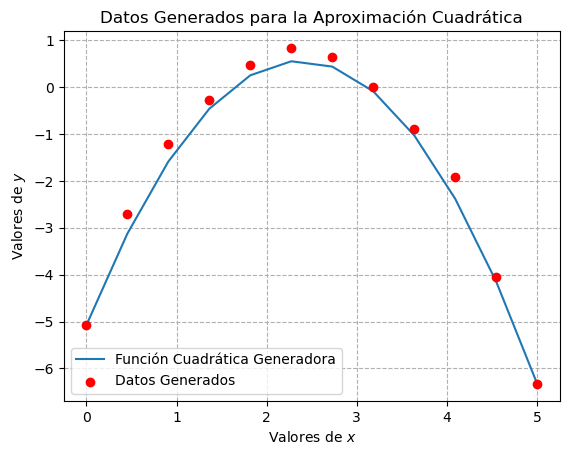

In [3]:
# Función cuadrática generadora
def funcion_cuadratica(x):
    return -x**2 + 4.75*x - 5.08

# Generar 12 puntos en el intervalo [0, 5]
x = np.linspace(0, 5, 12)
y_real = funcion_cuadratica(x)

# Lista de las perturbaciones aleatorias
ruido = 0.5 * np.random.rand(len(x))
y = y_real + ruido

# Visualizar los datos generados
plt.plot(x, y_real, label='Función Cuadrática Generadora')
plt.scatter(x, y, c='red', zorder=3, label='Datos Generados')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Datos Generados para la Aproximación Cuadrática')
plt.legend()
plt.grid(linestyle='--')

# Guardar y mostrar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Datos-Generados-Funcion-Cuadratica.pdf')
plt.show()

#### ***Aproximación Cuadrática***
A continuación se define el código para aproximar una función cuadrática mediante el conjunto de datos generados de forma aleatoria en la celda anterior.

Para el entrenamiento se define una tasa de aprendizaje $\alpha=0.0001$ con una cantidad de $200000$ épocas, para ello se usa el método del descenso del gradiente para actualizar los pesos de los parámetros de la función cuadrática que se quiere encontrar.

Cada $20000$ épocas se muestra el valor del costo y finalmente se muestran las gráficas los datos, la función aproximada y la gráfica de la evolución del costo.

Época 20000, Costo: 2.120861
Época 40000, Costo: 1.053860
Época 60000, Costo: 0.528483
Época 80000, Costo: 0.269780
Época 100000, Costo: 0.142391
Época 120000, Costo: 0.079663
Época 140000, Costo: 0.048775
Época 160000, Costo: 0.033565
Época 180000, Costo: 0.026076
Época 200000, Costo: 0.022388
Peso w2 aprendido: -0.996
Peso w1 aprendido: 4.692
Sesgo aprendido: -4.748
Función Cuadrática Aproximada: f(x) = -0.996x^2 + 4.692x + -4.748


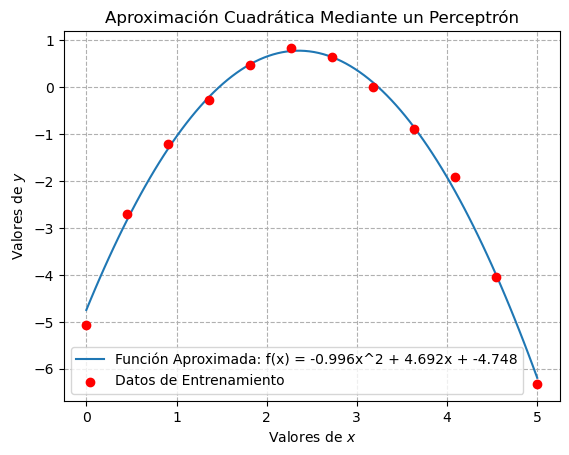

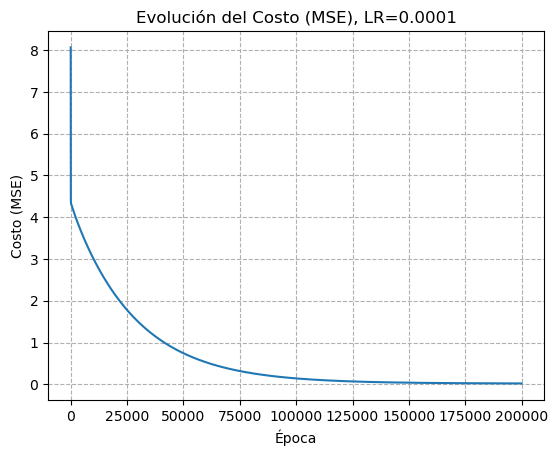

In [5]:
# Inializamos los pesos y el sesgo
w2 = 0.0
w1 = 0.0
b = 0.0
alfa = 0.0001
epocas = 200000
historial_costo = []
n = len(x)

# Entrenamos el perceptron mediante descenso del gradienet
for epoca in range(epocas):
    
    # Calcular las predicciones del perceptrón con las características expandidas
    y_ = w2 * x**2 + w1 * x + b
    
    # Calcular el costo (MSE)
    costo = np.mean((y_ - y)**2)
    historial_costo.append(costo)
    
    if (costo < 0.01):
        break
    
    # Calcular los gradientes
    dw2 = (2/n) * np.sum((y_ - y) * x**2)
    dw1 = (2/n) * np.sum((y_ - y) * x)
    db = (2/n) * np.sum(y_ - y)
    
    # Actualizamos los pesos y el sesgo
    w2 = w2 - alfa * dw2
    w1 = w1 - alfa * dw1
    b  = b - alfa * db
    
    # Imprimir el costo cada 10000 épocas para monitorear el progreso (opcional)
    if (epoca + 1) % 20000 == 0:
        print(f'Época {epoca + 1}, Costo: {costo:.6f}')

# Imprimir los resultados
print(f"Peso w2 aprendido: {w2:.3f}")
print(f"Peso w1 aprendido: {w1:.3f}")
print(f"Sesgo aprendido: {b:.3f}")
print(f"Función Cuadrática Aproximada: f(x) = {w2:.3f}x^2 + {w1:.3f}x + {b:.3f}")

# Generar los puntos para la curva de ajuste
x_dom = np.linspace(min(x), max(x), 100)
y_eval = w2 * x_dom**2 + w1 * x_dom + b

# Graficar los datos de aprendizaje y la aproximación
plt.plot(x_dom, y_eval, label=f'Función Aproximada: f(x) = {w2:.3f}x^2 + {w1:.3f}x + {b:.3f}')
plt.scatter(x, y, c='red', zorder=3, label='Datos de Entrenamiento')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Aproximación Cuadrática Mediante un Perceptrón')
plt.legend()
plt.grid(linestyle='--')

# Guardar la gráfica y mostrar
plt.savefig('../Teoria-Aproximacion/Imagenes/Aproximacion-Funcion-Cuadratica.pdf')
plt.show()

# Graficar la función de costo durante el entrenamiento
plt.figure()
plt.plot(range(epocas), historial_costo)
plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title(f'Evolución del Costo (MSE), LR={alfa}')
plt.grid(linestyle='--')

# Guardar la gráfica y mostrar
plt.savefig('../Teoria-Aproximacion/Imagenes/Evolucion-Aprendizaje-Aproximacion-Funcion-Cuadratica.pdf')
plt.show()